<p style="font-size:14px">
Em cenários acadêmicos, o desempenho dos alunos pode ser influenciado por diversos fatores, sendo as horas de estudo uma das mais óbvias. No entanto, o cansaço também pode ser um fator relevante, onde estudar por muitas horas seguidas pode resultar em uma menor eficiência, refletindo em notas mais baixas. Portanto, a proposta aqui é:
</p>

### Proposta 📋

<p style="font-size:14px">
1. Restringir o tempo máximo de estudo a 24 horas;<br>
2. Garantir que a nota final nunca ultrapasse o valor máximo de 100;<br>
3. Considerar se o aluno está "cansado" (0 para não cansado e 1 para cansado), o que impacta negativamente a nota.
</p>

### Observações 📋

<p style="font-size:14px">
1. Horas de Estudo: Um valor entre 0 e 24, onde quanto mais tempo o aluno estuda, maior a nota. No entanto, o efeito do estudo tem limites, e a produtividade começa a cair após um certo número de horas.<br> 
2. Cansado: Um valor binário (0 ou 1), onde "1" indica que o aluno está cansado, resultando em uma redução na nota final. <br>
3. O desempenho final (nota) é calculado com base nas horas de estudo, mas limitado ao valor máximo de 100. <br>
4. Se o aluno está cansado, a nota é reduzida. As notas são geradas com base em uma função linear, multiplicando as horas de estudo por um fator aleatório (para simular variações na eficiência), e se o aluno estiver cansado, subtraímos pontos da nota final.
</p>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
# Considerando os valores em AULA:

In [143]:
# Gerar Seed:
np.random.seed()
n_samples = 1_000

# gerar Arrays:
horas_estudo = np.random.uniform(0,24,n_samples)
cansado = np.random.choice([0,1], n_samples)
nota = np.minimum(horas_estudo * np.random.uniform(3,5), 100)- (cansado * 10)

In [144]:
pd.Series(nota).sort_values()

185     -9.629274
71      -9.578257
285     -9.445020
195     -8.620786
572     -8.107392
          ...    
79     100.000000
140    100.000000
507    100.000000
570    100.000000
993    100.000000
Length: 1000, dtype: float64

In [145]:
nota = np.clip(nota, 0, 100)

In [146]:
# Garantir os valores corretos
data = pd.DataFrame({
    'Horas de estudo': horas_estudo,
    'Cansado': cansado,
    'Nota':nota
})
data.head()

,Horas de estudo,Cansado,Nota
0,14.066788,0,63.031476
1,22.158787,1,89.290688
2,2.936812,1,3.159480
3,0.577088,0,2.585858
4,17.210425,1,67.117712


In [147]:
hora_de_estudo = data['Horas de estudo'].values
valor_nota = data['Nota'].values

In [148]:
hora_de_estudo[:5]

array([14.06678806, 22.15878739,  2.93681225,  0.57708814, 17.21042539])

In [149]:

valor_nota[:5]

array([63.03147557, 89.29068808,  3.15947952,  2.58585802, 67.11771176])

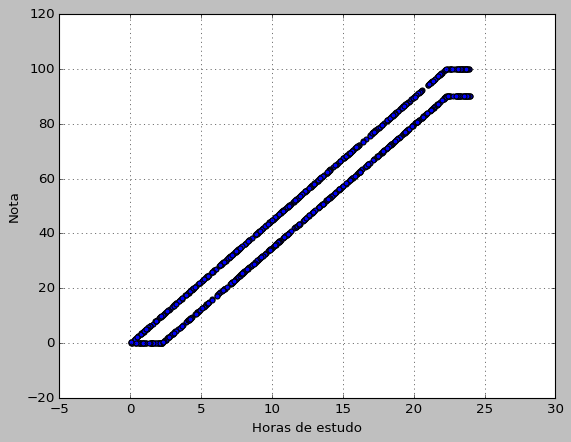

In [150]:
plt.style.use('classic')

# plot
fig, ax = plt.subplots()
ax.scatter(
    x=hora_de_estudo, 
    y=valor_nota
    )

plt.grid()
plt.xlabel('Horas de estudo')
plt.ylabel('Nota')

plt.show()